<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##regression bagging RFs
library(MASS)

In [9]:
n <- dim(Boston)[1]

In [4]:
n

[1] 506

In [5]:
sum(is.na(Boston))

[1] 0

In [6]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [7]:
set.seed(1)

In [10]:
train = sample(n, n/2)

In [11]:
btrain = Boston[train,]

In [12]:
btest = Boston[-train,]

In [14]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [16]:
bb = randomForest(medv~., data = btrain, mtry = 13, importance = T)

In [17]:
bb


Call:
 randomForest(formula = medv ~ ., data = btrain, mtry = 13, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 13.1489
                    % Var explained: 85.2

In [19]:
pb = predict(bb, newdata = btest)

In [20]:
mean( (pb - btest$medv)^2) # test MSE
sqrt(mean( (pb - btest$medv)^2)) # test RMSE

[1] 16.0594

[1] 4.007419

In [21]:
brf = randomForest(medv~., data = btrain, mtry = 4, importance = T)
brf


Call:
 randomForest(formula = medv ~ ., data = btrain, mtry = 4, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.83621
                    % Var explained: 85.55

In [22]:
prf = predict(brf, newdata = btest)

In [23]:
mean( (prf - btest$medv)^2) #test MSE
sqrt(mean( (prf - btest$medv)^2)) # test RMSE

[1] 13.12477

[1] 3.622812

[1] 0.9199892

,%IncMSE,IncNodePurity
crim,13.789155,1526.0819
zn,2.745459,137.2776
indus,8.519039,682.1926
chas,3.332088,237.2080
nox,12.746625,1383.4398
rm,25.738049,6575.7933
age,12.961243,655.1832
dis,12.877636,1270.1347
rad,4.076053,198.0493
tax,9.603561,757.0740


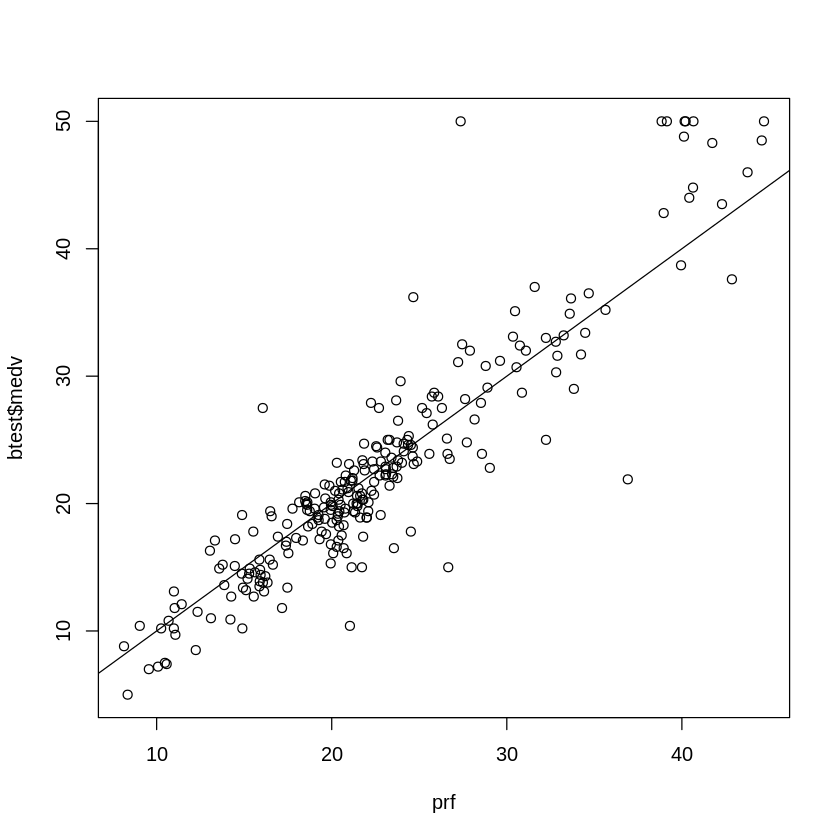

In [24]:
cor(prf, btest$medv)
plot(prf, btest$medv)
abline(0,1)
importance(brf)

In [27]:
install.packages("gbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [28]:
library(gbm)

Loaded gbm 2.1.8



In [29]:
x1 <- c(0.4, 0.5, 0.7, 0.8, 0.1, 0.3, 0.5, 0.2, 0.3, 0.9)
x2 <- c(0.8, 0.9, 0.7, 0.8, 0.6, 0.6, 0.6, 0.3, 0.1, 0.3)
y <- c(1,1,1,0,1,0,0,1,0,0)

In [30]:
fit = gbm(y~x1+x2, distribution = "adaboost", n.trees = 3, interaction.depth = 1, n.minobsinnode = 2, bag.fraction = 1)

In [31]:
fit

gbm(formula = y ~ x1 + x2, distribution = "adaboost", n.trees = 3, 
    interaction.depth = 1, n.minobsinnode = 2, bag.fraction = 1)
A gradient boosted model with adaboost loss function.
3 iterations were performed.
There were 2 predictors of which 1 had non-zero influence.

In [32]:
fit$fit

[1] -0.02264978 -0.02264978 -0.02264978 -0.14773687  0.22508709 -0.02264978
 [7] -0.02264978  0.22508709 -0.02264978 -0.14773687

In [33]:
fit$trees

[[1]]
[[1]][[1]]
[1]  0 -1 -1 -1

[[1]][[2]]
[1]  0.250  0.100 -0.025  0.000

[[1]][[3]]
[1]  1 -1 -1 -1

[[1]][[4]]
[1]  2 -1 -1 -1

[[1]][[5]]
[1]  3 -1 -1 -1

[[1]][[6]]
[1] 2.5 0.0 0.0 0.0

[[1]][[7]]
[1] 10  2  8 10

[[1]][[8]]
[1]  0.000  0.100 -0.025  0.000


[[2]]
[[2]][[1]]
[1]  0 -1 -1 -1

[[2]][[2]]
[1]  7.500000e-01  2.508709e-02 -1.000000e-01  6.967097e-05

[[2]][[3]]
[1]  1 -1 -1 -1

[[2]][[4]]
[1]  2 -1 -1 -1

[[2]][[5]]
[1]  3 -1 -1 -1

[[2]][[6]]
[1] 2.382499 0.000000 0.000000 0.000000

[[2]][[7]]
[1] 10  8  2 10

[[2]][[8]]
[1]  6.967097e-05  2.508709e-02 -1.000000e-01  6.967097e-05


[[3]]
[[3]][[1]]
[1]  0 -1 -1 -1

[[3]][[2]]
[1]  0.250000000  0.100000000 -0.022736867  0.001810506

[[3]][[3]]
[1]  1 -1 -1 -1

[[3]][[4]]
[1]  2 -1 -1 -1

[[3]][[5]]
[1]  3 -1 -1 -1

[[3]][[6]]
[1] 1.946961 0.000000 0.000000 0.000000

[[3]][[7]]
[1] 10  2  8 10

[[3]][[8]]
[1]  0.001810506  0.100000000 -0.022736867  0.001810506

In [34]:
##Boosting for regression based on Trees

In [35]:
set.seed(1)

In [37]:
bfit = gbm(medv~., data = btrain, distribution = "gaussian", interaction.depth = 1, n.trees = 100, n.minobsinnode = 10, shrinkage = 0.01, cv.folds = 10)

[1] 100

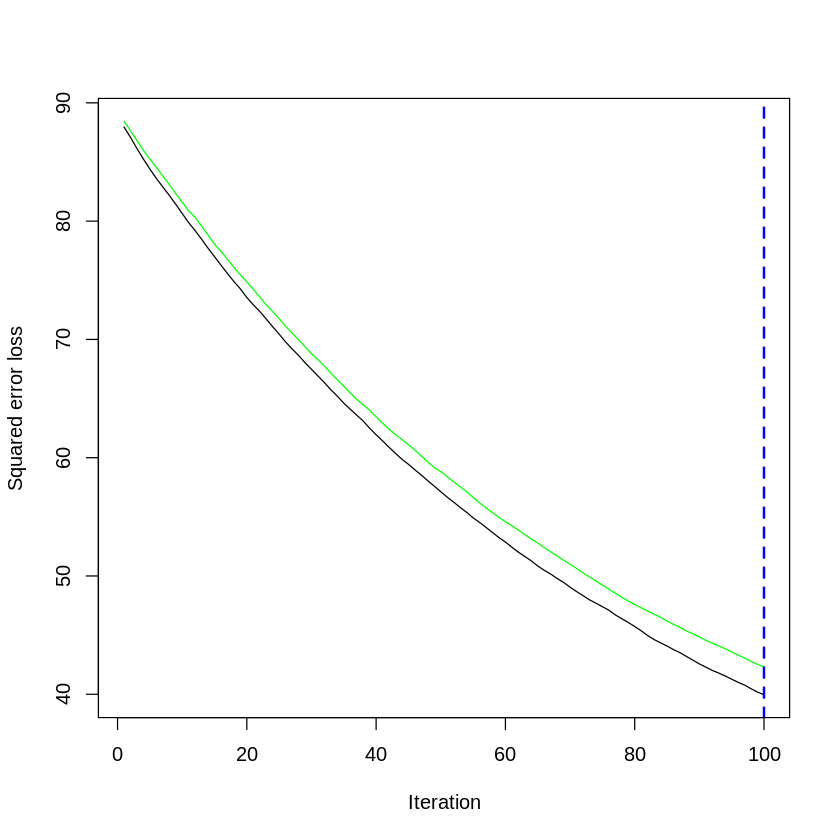

In [38]:
bt = gbm.perf(bfit, method = "cv")
bt

[1] 1000

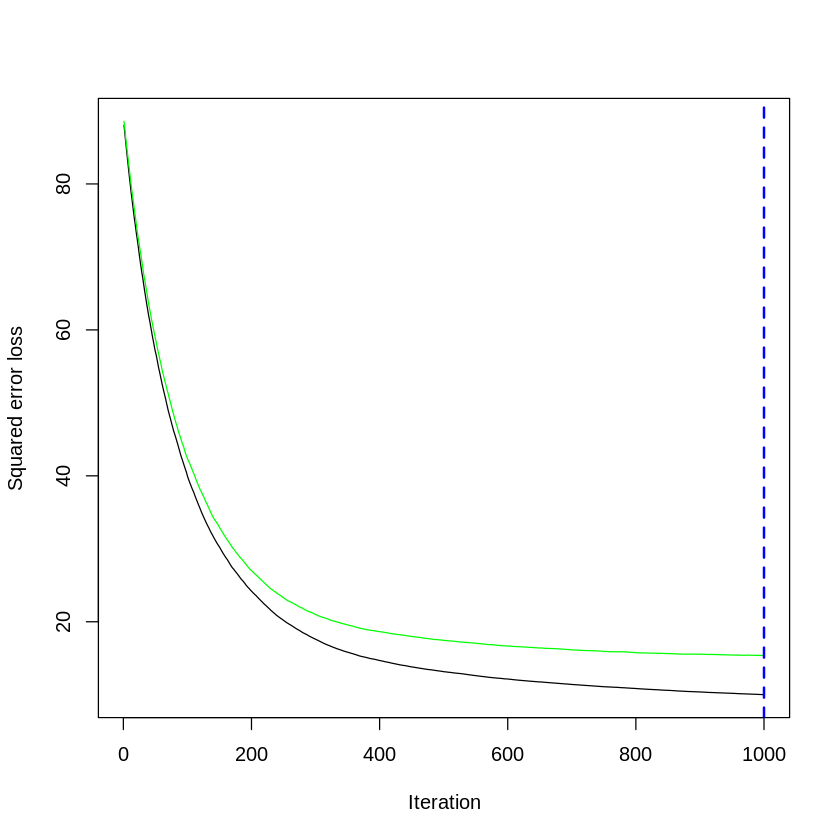

In [39]:
bfit = gbm(medv~., data = btrain, distribution = "gaussian", interaction.depth = 1, n.trees = 1000, n.minobsinnode = 10, shrinkage = 0.01, cv.folds = 10)
bt = gbm.perf(bfit, method = "cv")
bt

[1] 2523

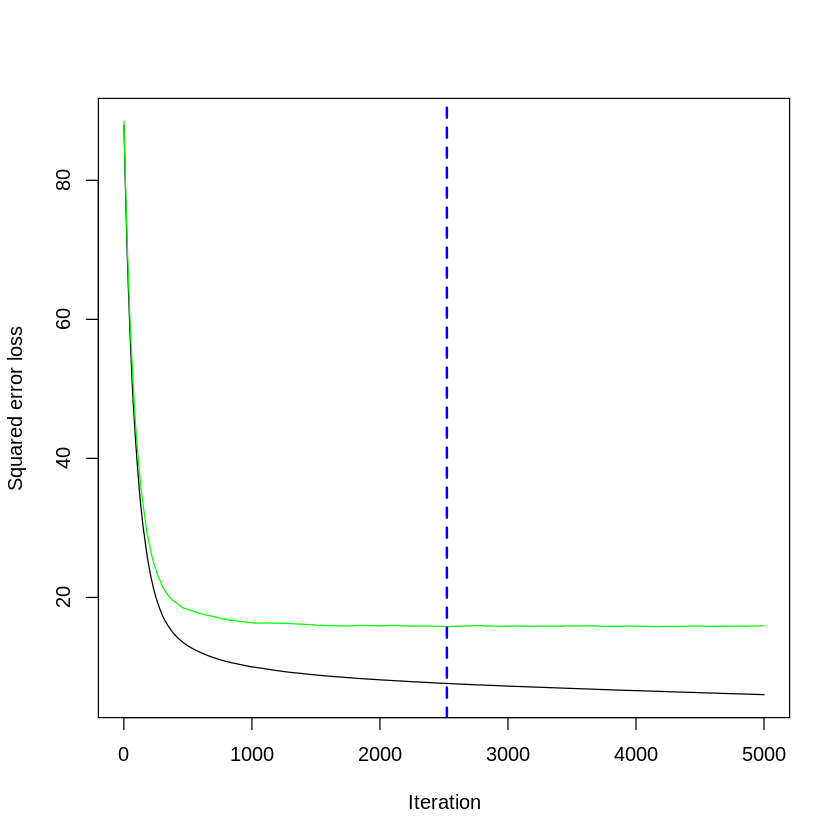

In [40]:
bfit = gbm(medv~., data = btrain, distribution = "gaussian", interaction.depth = 1, n.trees = 5000, n.minobsinnode = 10, shrinkage = 0.01, cv.folds = 10)
bt = gbm.perf(bfit, method = "cv")
bt

In [41]:
bp = predict(bfit, newdata = btest, bt)

In [42]:
mean( (bp - btest$medv)^2) # test MSE

[1] 16.56926

In [43]:
sqrt(mean( (bp - btest$medv)^2)) ## test RMSE

[1] 4.070536

In [45]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [46]:
 ## More tuning for boosting methods
 library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [47]:
myControl = trainControl(method = "cv", number = 10)

In [51]:
myGrid = expand.grid(interaction.depth = c(1,2,3,4), shrinkage = c(0.1, 0.01, 0.001), n.trees = ((1:100)*50),
n.minobsinnode = c(5,10))

In [52]:
set.seed(1)

In [53]:
bgbm = train(medv~., data = btrain, distribution = "gaussian", method = "gbm", trControl = myControl, tuneGrid = myGrid) # grid search for the tuning

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(bgbm)

In [54]:
bgdm$bestTune

ERROR: ignored

In [ ]:
predgbm = predict(bgbm, newdata = btest)

In [ ]:
mean( (predgbm - btest$medv)^2)
sqrt(mean( (predgbm - btest$medv)^2))

In [55]:
##Adaboosting example

In [ ]:
hgbm = train(AHD~., data = htrain, distribution = "adaboost", method = "gbm", trControl = myControl, tuneGrid = myGrid)
hgbm$bestTune
predh = predict(hgbm, htest) #predicted class
predict
#predict(hgbm, htest, type = "prob") -> postreio prob
confusionMatrix(predh, htest$AHD, positive = "Yes")

In [ ]:
#We may use caret package train function to perofrm a grid search of the tuning parapmer